In [2]:
# Get your import statement here
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
%matplotlib inline

In [3]:
# Load your dataset here
df = pd.read_csv('nyc-rolling-sales.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the head() function.

In [4]:
# Write your syntax here
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [6]:
df.shape

(84548, 22)

In [7]:
data = df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1)
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [8]:
data['Borough1'] = df['BOROUGH'].replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
data.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Borough1
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan


In [42]:
data['SALE PRICE2'] = pd.to_numeric(data['SALE PRICE'], errors='coerce').convert_dtypes()

In [41]:
data['SALE PRICE2'] = data['SALE PRICE2'].astype(np.int64)
data.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Borough1,SALE PRICE2
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,5,1633.0,6440.0,1900,2,C2,6625000,2017-07-19,Manhattan,6625000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,10,2272.0,6794.0,1913,2,C4,3936272,2016-09-23,Manhattan,3936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,6,2369.0,4615.0,1900,2,C2,8000000,2016-11-17,Manhattan,8000000
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,8,1750.0,4226.0,1920,2,C4,3192840,2016-09-23,Manhattan,3192840
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,24,4489.0,18523.0,1920,2,D9,16232000,2016-11-07,Manhattan,16232000


In [44]:
# menghapus missing data
data = data.dropna()
data.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Borough1,SALE PRICE2
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,5,1633.0,6440.0,1900,2,C2,6625000,2017-07-19,Manhattan,6625000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,10,2272.0,6794.0,1913,2,C4,3936272,2016-09-23,Manhattan,3936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,6,2369.0,4615.0,1900,2,C2,8000000,2016-11-17,Manhattan,8000000
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,8,1750.0,4226.0,1920,2,C4,3192840,2016-09-23,Manhattan,3192840
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,24,4489.0,18523.0,1920,2,D9,16232000,2016-11-07,Manhattan,16232000
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,530-532 EAST 5TH STREET,,10009,...,10,3717.0,12350.0,2009,2,D1,10350000,2016-10-17,Manhattan,10350000
22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,,10009,...,24,4131.0,16776.0,1928,2,C6,11900000,2017-06-21,Manhattan,11900000
73,1,ALPHABET CITY,11A CONDO-RENTALS,2,385,1102,RR,254 EAST 2ND STREET,RES,10009,...,47,36472.0,36472.0,2005,2,RR,28000000,2016-10-13,Manhattan,28000000
75,1,ALPHABET CITY,11A CONDO-RENTALS,2,397,1301,RR,250 EAST HOUSTON STREET,UNIT1,10002,...,132,33650.0,33650.0,1989,2,RR,52625000,2016-10-19,Manhattan,52625000
172,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,,10009,...,4,1520.0,3360.0,1910,2,S3,3300000,2016-11-15,Manhattan,3300000


In [11]:
# menghapus harga rumah <$100.000,-
data = data[data['SALE PRICE2'] > 100000]

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36406 entries, 0 to 84546
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         36406 non-null  int64         
 1   NEIGHBORHOOD                    36406 non-null  category      
 2   BUILDING CLASS CATEGORY         36406 non-null  category      
 3   TAX CLASS AT PRESENT            36406 non-null  category      
 4   BLOCK                           36406 non-null  int64         
 5   LOT                             36406 non-null  int64         
 6   BUILDING CLASS AT PRESENT       36406 non-null  object        
 7   ADDRESS                         36406 non-null  object        
 8   APARTMENT NUMBER                36406 non-null  object        
 9   ZIP CODE                        36406 non-null  int64         
 10  RESIDENTIAL UNITS               36406 non-null  int64         
 11  CO

In [13]:
print('Column name')
for col in data.columns:
    if data[col].dtype=='object':
        print(col,data[col].nunique())

Column name
NEIGHBORHOOD 253
BUILDING CLASS CATEGORY 45
TAX CLASS AT PRESENT 10
BUILDING CLASS AT PRESENT 150
ADDRESS 47543
APARTMENT NUMBER 2887
LAND SQUARE FEET 4706
GROSS SQUARE FEET 4423
BUILDING CLASS AT TIME OF SALE 150
SALE PRICE 9543
SALE DATE 331
Borough1 5


In [14]:
numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    data[col] = data[col].astype('category')
    
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], errors='coerce')

In [15]:
missing = data.isnull().sum()/len(data)*100

print(pd.DataFrame([missing[missing>0], pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing', 'how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET
percent missing          36.165959          36.942798
how many missing               NaN                NaN


In [16]:
print(data[(data['LAND SQUARE FEET'].isnull()) & (data['GROSS SQUARE FEET'].notnull())].shape)
print(data[(data['LAND SQUARE FEET'].notnull()) & (data['GROSS SQUARE FEET'].isnull())].shape)

(4, 22)
(447, 22)


In [17]:
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].mask((data['LAND SQUARE FEET'].isnull()) & (data['GROSS SQUARE FEET'].notnull()), data['GROSS SQUARE FEET'])
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].mask((data['LAND SQUARE FEET'].notnull()) & (data['GROSS SQUARE FEET'].isnull()), data['LAND SQUARE FEET'])

In [46]:
print(sum(data.duplicated()))

data[data.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

64


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Borough1,SALE PRICE2
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,...,1,500.0,1354.0,1996,1,A5,320000,2017-06-06,Staten Island,320000
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,...,1,500.0,1354.0,1996,1,A5,320000,2017-06-06,Staten Island,320000
50265,4,ASTORIA,07 RENTALS - WALKUP APARTMENTS,2,839,21,C1,27-01 ASTORIA BOULEVARD,,11102,...,20,4710.0,11324.0,1973,2,C1,832500,2017-04-07,Queens,832500
50266,4,ASTORIA,07 RENTALS - WALKUP APARTMENTS,2,839,21,C1,27-01 ASTORIA BOULEVARD,,11102,...,20,4710.0,11324.0,1973,2,C1,832500,2017-04-07,Queens,832500
26202,3,BAY RIDGE,10 COOPS - ELEVATOR APARTMENTS,2,5906,18,D4,180 72 ST,,11209,...,0,0.0,0.0,1932,2,D4,355050,2017-04-28,Brooklyn,355050
26203,3,BAY RIDGE,10 COOPS - ELEVATOR APARTMENTS,2,5906,18,D4,180 72 ST,,11209,...,0,0.0,0.0,1932,2,D4,355050,2017-04-28,Brooklyn,355050
27499,3,BEDFORD STUYVESANT,12 CONDOS - WALKUP APARTMENTS,2,1953,1110,R2,142 CLIFTON PLACE,1B,11238,...,1,0.0,0.0,2010,2,R2,995000,2016-12-29,Brooklyn,995000
27500,3,BEDFORD STUYVESANT,12 CONDOS - WALKUP APARTMENTS,2,1953,1110,R2,142 CLIFTON PLACE,1B,11238,...,1,0.0,0.0,2010,2,R2,995000,2016-12-29,Brooklyn,995000
52168,4,BELLE HARBOR,01 ONE FAMILY DWELLINGS,1,16196,23,A1,533 BEACH 128TH STREET,,11694,...,1,4000.0,2186.0,1945,1,A1,1150000,2017-08-07,Queens,1150000
52169,4,BELLE HARBOR,01 ONE FAMILY DWELLINGS,1,16196,23,A1,533 BEACH 128TH STREET,,11694,...,1,4000.0,2186.0,1945,1,A1,1150000,2017-08-07,Queens,1150000


In [47]:
data[data['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE PRICE2
count,33815.000000,33815.000000,33815.000000,33815.000000,33815.000000,33815.0,33815.000000,3.381500e+04,3.381500e+04,33815.000000,3.381500e+04,3.381500e+04
mean,3.431081,5245.638119,232.169481,10909.736123,2.099985,0.0,2.103504,3.019633e+03,2.494232e+03,1836.075410,9.948135e+05,9.948135e+05
std,0.942750,3660.837757,485.385355,1203.586658,10.918764,0.0,10.918248,3.503505e+04,3.218150e+04,452.616128,3.349825e+06,3.349825e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,1.007000e+05,1.007000e+05
25%,3.000000,2266.000000,22.000000,10466.000000,1.000000,0.0,1.000000,1.300000e+03,8.000000e+02,1920.000000,4.100000e+05,4.100000e+05
50%,3.000000,4816.000000,46.000000,11218.000000,1.000000,0.0,1.000000,2.200000e+03,1.496000e+03,1935.000000,6.070000e+05,6.070000e+05
75%,4.000000,7358.500000,102.000000,11360.000000,2.000000,0.0,2.000000,3.192500e+03,2.208000e+03,1964.000000,9.163230e+05,9.163230e+05
max,5.000000,16319.000000,9056.000000,11694.000000,771.000000,0.0,771.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08,3.450000e+08


In [48]:
data[data['RESIDENTIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE PRICE2
count,5400.000000,5400.000000,5400.000000,5400.000000,5400.0,5400.000000,5400.000000,5.400000e+03,5.400000e+03,5400.000000,5.400000e+03,5.400000e+03
mean,2.884074,4415.808519,178.245741,10287.537222,0.0,1.327963,1.350000,8.044833e+03,8.437428e+03,1612.244815,3.878488e+06,3.878488e+06
std,0.775556,3006.304569,398.679170,2719.266111,0.0,32.629119,32.628552,1.001105e+05,8.919406e+04,734.414474,3.814412e+07,3.814412e+07
min,1.000000,5.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.010000e+05,1.010000e+05
25%,3.000000,1788.000000,12.000000,10463.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1920.000000,2.500000e+05,2.500000e+05
50%,3.000000,4905.500000,38.000000,11209.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1940.000000,4.600000e+05,4.600000e+05
75%,3.000000,6462.000000,79.250000,11229.000000,0.0,0.000000,0.000000,2.500000e+03,1.522500e+03,1960.000000,1.070300e+06,1.070300e+06
max,5.000000,16315.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2016.000000,2.210000e+09,2.210000e+09


Findings:
- There are zipcodes with 0 value
- Year column has a year with 0
- Land square feet and gross square feet has minimum of 0

In [21]:
data.value_counts('Borough1')

Borough1
Queens           17668
Brooklyn         14870
Manhattan        14056
Staten Island     5731
Bronx             4701
dtype: int64

From here, we can calculate the mean for each Borough. Use .mean() function to calculate mean.

Function below are graded function. (1 Points)

In [49]:
# Write your function below
data.groupby('Borough1').mean()

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE PRICE2
Borough1,,,,,,,,,,,,
Bronx,2.0,4264.940651,295.876409,10410.930440,3.151032,0.142310,3.294193,3408.252287,3914.606679,1803.801744,8.810218e+05,881021.774729
Brooklyn,3.0,4207.785205,371.610424,11074.059852,1.744654,0.106927,1.858036,1973.391459,2073.666106,1776.555952,1.348161e+06,1348160.694351
Manhattan,1.0,1328.385684,67.623932,9986.767094,19.054487,2.242521,21.288462,5757.291667,31084.446581,1851.007479,2.077171e+07,20771706.227564
Queens,4.0,7989.195354,54.497501,11341.191930,2.191375,0.420507,2.611142,4063.467240,3081.611790,1913.799186,9.805953e+05,980595.2866
Staten Island,5.0,3392.908109,81.104457,10138.020617,1.297271,0.093854,1.389947,8165.811506,4757.123110,1922.117023,6.012193e+05,601219.292755


From here, we can calculate the median for each Borough. Use .median() function to calculate median.

Function below are graded function. (1 Points)

In [50]:
# Write your function below
data.groupby('Borough1').median()
# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE PRICE2
Borough1,,,,,,,,,,,,
Bronx,2.0,4287.0,47.0,10465.0,1.0,0.0,1.0,2300.0,1734.0,1935.0,427665.0,427665.0
Brooklyn,3.0,4246.5,52.0,11219.0,1.0,0.0,1.0,1620.0,1238.0,1930.0,795000.0,795000.0
Manhattan,1.0,1429.0,33.0,10026.0,4.0,0.0,6.0,2469.0,7000.0,1910.0,6995000.0,6995000.0
Queens,4.0,8776.0,36.0,11412.0,1.0,0.0,1.0,2794.0,1632.0,1931.0,650000.0,650000.0
Staten Island,5.0,3249.0,49.0,10308.0,1.0,0.0,1.0,3431.0,1580.0,1973.0,495000.0,495000.0


From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [51]:
# Write your function below
data.groupby('Borough1').agg(pd.Series.mode)
# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE PRICE2
Borough1,,,,,,,,,,,,,,,,,,,,,
Bronx,2,RIVERDALE,02 TWO FAMILY DWELLINGS,1,3944,1,D4,2287 JOHNSON AVENUE,,10463,...,0,1,0.0,0.0,1920,1,D4,500000,2017-04-06,500000
Brooklyn,3,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,2135,1,R4,429 KENT AVENUE,,11201,...,0,1,0.0,0.0,0,1,R4,650000,2017-06-29,650000
Manhattan,1,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2,1630,1,C7,102 WEST 57TH STREET,,10029,...,0,1,2523.0,"[2500.0, 7000.0, 112850.0, 267008.0]",1910,2,C7,"[8000000, 18000000]",2016-12-16,"[8000000, 18000000]"
Queens,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,"[5863, 11781, 12202]",1,A1,"[160-49 122ND AVENUE, 193-08 STATION ROAD, 2...",,11434,...,0,1,4000.0,1224.0,1920,1,A1,650000,2016-10-28,650000
Staten Island,5,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,2873,1,A5,SERENA COURT,,10314,...,0,1,4000.0,1200.0,1970,1,A5,450000,2016-12-05,450000


From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [52]:
# Write your function below
data.groupby("Borough1")["SALE PRICE2"].max() - data.groupby("Borough1")["SALE PRICE2"].min()
# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

Borough1
Bronx             109898500
Brooklyn          344899000
Manhattan        2209892180
Queens            257398635
Staten Island     121899300
Name: SALE PRICE2, dtype: Int64

From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [53]:
# Write your function below
data.groupby('BOROUGH').var()
# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE PRICE2
BOROUGH,,,,,,,,,,,
1,3.636063e+05,103525.302272,4.302307e+05,4403.752108,201.525078,4582.673920,2.063514e+08,1.133192e+10,122727.066254,8.293655e+15,8293655389005159.0
2,1.165565e+06,560038.003658,5.563639e+05,478.641014,0.687190,495.025985,2.844557e+08,5.365024e+08,253702.338559,1.136058e+13,11360582224481.095703
3,7.480779e+06,297522.367219,1.621358e+06,31.610024,0.346223,32.216377,2.923794e+08,9.645209e+07,301475.054472,2.435976e+13,24359755496119.558594
4,1.903257e+07,9430.876208,6.207405e+05,390.435931,511.699696,908.921982,1.690191e+09,1.440589e+09,50371.408629,1.749129e+13,17491291528237.875
5,5.637567e+06,9014.122237,1.723948e+06,5.113105,6.332902,11.282318,9.606694e+09,6.459261e+09,90967.436421,4.229035e+12,4229035353164.212891


From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [54]:
# Write your function below
data.groupby('Borough1').std(ddof=1)
# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE PRICE2
Borough1,,,,,,,,,,,,
Bronx,0.0,1079.613157,748.356869,745.898023,21.877866,0.828969,22.249179,16865.815131,23162.520921,503.688732,3.370546e+06,3.370546e+06
Brooklyn,0.0,2735.101288,545.456109,1273.325721,5.622279,0.588407,5.675947,17099.106266,9821.002663,549.067441,4.935560e+06,4.935560e+06
Manhattan,0.0,602.997778,321.753481,655.919712,66.360772,14.195953,67.695450,14364.937517,106451.489560,350.324230,9.106951e+07,9.106951e+07
Queens,0.0,4362.633931,97.112698,787.870858,19.759452,22.620780,30.148333,41111.930145,37955.087228,224.435756,4.182259e+06,4.182259e+06
Staten Island,0.0,2374.356042,94.942731,1312.991934,2.261218,2.516526,3.358916,98013.743760,80369.524994,301.608084,2.056462e+06,2.056462e+06


Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

In [207]:
# Write your function below

# Graded-Funtion Begin





# Graded-Funtion End

In [58]:
from scipy.stats import norm

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

from scipy.stats import uniform

In [60]:
# mengambil data SALE PRICE2 Brooklyn untuk dibuat distribusinya
brooklyn = data[data['Borough1'] == 'Brooklyn']
brooklyn_price = brooklyn[["SALE PRICE2"]]
print(brooklyn_price.shape)
brooklyn_price.head()

(14870, 1)


,SALE PRICE2
25355,800000
25358,1200000
25359,1090000
25361,1060000
25362,2050000


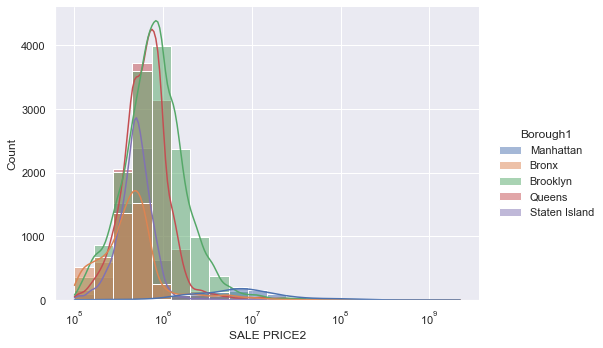

In [73]:
sns.displot(
    data=data,
    x='SALE PRICE2',
    hue='Borough1',
    kind='hist',
    aspect=1.4,
    log_scale=10,
    bins=20,
    kde=True
)

Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [55]:
# menghitung CI untuk Sale Price di Borough Manhattan
sale = data[["Borough1","SALE PRICE2"]]
print(sale.shape)
sale.head()

(36406, 2)


,Borough1,SALE PRICE2
0,Manhattan,6625000
3,Manhattan,3936272
4,Manhattan,8000000
6,Manhattan,3192840
9,Manhattan,16232000


In [56]:
sale.groupby('Borough1').agg({"SALE PRICE2": [np.mean, np.std, np.size]})

SALE PRICE2                     
                          mean           std   size
Borough1                                           
Bronx            881021.774729  3.370546e+06   4701
Brooklyn        1348160.694351  4.935560e+06  14870
Manhattan      20771706.227564  9.106951e+07    936
Queens             980595.2866  4.182259e+06  10806
Staten Island    601219.292755  2.056462e+06   5093

In [30]:
mean_man = 3428085.84 # mean harga jual di Manhattan
sd_man = 2441764 # standard deviation harga jual di Manhattan
n_man = 14056 # total jumlah penjualan rumah di Manhattan
z_man = 1.96 # skor z

In [31]:
se_man = sd_man / np.sqrt(n_man)
se_man

20595.522400496317

In [32]:
lcb = mean_man - z_man* se_man
ucb = mean_man + z_man* se_man
lcb, ucb

(3387718.616095027, 3468453.0639049727)

95% keyakinan bahwa harga jual properti di Manhattan ada di antara $3,387,719 - $3,468,453

Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [33]:
import statsmodels.api as sm

In [34]:
bronx = data[data['Borough1'] == 'Bronx']
queens = data[data['Borough1'] == 'Queens']

n_b = len(bronx)
mean_b = bronx['SALE PRICE2'].mean()
std_b = bronx['SALE PRICE2'].std()

n_q = len(queens)
mean_q = queens['SALE PRICE2'].mean()
std_q = queens['SALE PRICE2'].std()

print(n_b, mean_b, std_b)
print(n_q, mean_q, std_q)

4701 881021.7747287811 3370546.279830772
17668 770980.5930495812 3300377.3838097346


In [35]:
# Write your function below
print(("zstat", "p-value"))
sm.stats.ztest(bronx["SALE PRICE2"], queens["SALE PRICE2"], alternative='two-sided')

# Graded-Funtion Begin





# Graded-Funtion End

('zstat', 'p-value')


(2.0225772312577317, 0.04311675362015397)

- p value < alpha
- 0.043 < 0.05
- hipotesis nol dapat ditolak

kesimpulan: harga jual properti antara borough Bronx dan Queens berbeda secara signifikan

In [66]:
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Borough1,SALE PRICE2
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,5,1633.0,6440.0,1900,2,C2,6625000,2017-07-19,Manhattan,6625000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,10,2272.0,6794.0,1913,2,C4,3936272,2016-09-23,Manhattan,3936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,6,2369.0,4615.0,1900,2,C2,8000000,2016-11-17,Manhattan,8000000
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,8,1750.0,4226.0,1920,2,C4,3192840,2016-09-23,Manhattan,3192840
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,24,4489.0,18523.0,1920,2,D9,16232000,2016-11-07,Manhattan,16232000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,112 ROBIN COURT,,10309,...,2,11088.0,2160.0,1994,1,B2,648000,2016-12-07,Staten Island,648000
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,2,2400.0,2575.0,1998,1,B9,450000,2016-11-28,Staten Island,450000
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,2,2498.0,2377.0,1998,1,B9,550000,2017-04-21,Staten Island,550000
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,2,4000.0,1496.0,1925,1,B2,460000,2017-07-05,Staten Island,460000
